___
# Ciência dos Dados - PROJETO 2

___
## André Neustein

## Carla Gaieski

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
import pandas as pd
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Carla Kim\Desktop\CD\DP\Projeto2-DPCD-master


In [88]:
import math
import matplotlib.pyplot as plt
import json
from random import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
#importando o arquivo
xlsx = pd.read_excel('spamhamV2.xlsx',sep=',')

In [123]:
#separando aleatoriamente 25% em teste e 75% em treinamento
train, test = train_test_split(xlsx, test_size = 0.25)
train.reset_index()
test.reset_index()

,index,Email,Class
0,2261,It should take about &lt;#&gt; min,ham
1,236,Or ill be a little closer like at the bus stop...,ham
2,3571,"Yup, leaving right now, be back soon",ham
3,4165,Well if I'm that desperate I'll just call arma...,ham
4,3705,Reading gud habit.. Nan bari hudgi yorge patai...,ham
5,3418,Do you want a new Video phone? 600 anytime any...,spam
6,1241,"I want to show you the world, princess :) how ...",ham
7,2870,I actually did for the first time in a while. ...,ham
8,50,What you thinked about me. First time you saw ...,ham
9,2315,That's cause your old. I live to be high.,ham


___
## 3. Classificador Naive-Bayes

In [124]:
def clean(email):
    email_final = email.replace("."," ").replace(","," ").replace("-"," ")\
    .replace(":"," ").replace(";"," ").replace("…"," ").replace("+"," ").replace('('," ").replace("'"," ").replace('"'," ")\
    .replace(')'," ").replace("@"," ").replace("#"," ").replace('  ',' ').replace('*',' ')
    return email_final

In [125]:
#criando dataframe de spams
trainspam = train.loc[train.Class == 'spam']
trainspam.head(2)

,Email,Class
5566,REMINDER FROM O2: To get 2.50 pounds free call...,spam
1153,1000's of girls many local 2 u who r virgins 2...,spam


In [126]:
#criando dataframe de hams
trainham = train.loc[train.Class == 'ham']
trainham.head(2)

,Email,Class
2549,Please sen :)my kind advice :-)please come her...,ham
2404,I'm meeting Darren...,ham


E-mails HAM:

In [127]:
#soma de tabela de emails ham
soma_ham = pd.Series(np.sum(trainham['Email']+'').split())

In [128]:
#fazendo uma lista de palavras que aparecem nos emails ham
palavras_ham = np.sum(trainham['Email']+'').split()

In [129]:
#calculo do total dos hams
total_ham = len(palavras_ham)

E-mails SPAM:

In [130]:
#soma de tabela spam
soma_spam = pd.Series(np.sum(trainspam['Email']+'').split())

In [131]:
#fazendo uma lista de palavras que aparecem nos spams
palavras_spam = np.sum(trainspam['Email']+'').split()


In [132]:
#calculo do total de spam
total_spam = len(palavras_spam)

Criando o classificador:

In [133]:
def classificador(mail):
    mail = mail.split(' ')
    #print(mail)
    prob_spam = []
    prob_ham = []
    prob_spam.append(train.Class.value_counts()['spam']/len(train))
    prob_ham.append(train.Class.value_counts()['ham']/len(train))
    for i in range(len(mail)):
        prob_spam.append((palavras_spam.count(mail[i])+1)/(total_spam+len(mail)))
        prob_ham.append((palavras_ham.count(mail[i])+1)/(total_ham+len(mail)))
    
    #multiplica os fatores da lista
    SPAM = np.prod(prob_spam)
    HAM = np.prod(prob_ham)
    
    if SPAM > HAM:
        return 'spam'
    else:
        return 'ham'
    

In [134]:
y = 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'
r = 'Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?'

In [135]:
#classificador(r)

TESTANDO

In [136]:
def limpando(mailtest):
    walker = mailtest
    return clean(walker)

L = test.Email.apply(limpando,1)
test["Email"] = L
test

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Email,Class
2261,It should take about &lt &gt min,ham
236,Or ill be a little closer like at the bus stop...,ham
3571,Yup leaving right now be back soon,ham
4165,Well if I m that desperate I ll just call arma...,ham
3705,Reading gud habit Nan bari hudgi yorge patais...,ham
3418,Do you want a new Video phone? 600 anytime any...,spam
1241,I want to show you the world princess how abo...,ham
2870,I actually did for the first time in a while I...,ham
50,What you thinked about me First time you saw m...,ham
2315,That s cause your old I live to be high,ham


In [137]:
def testando(emailteste):
    oracao = emailteste
    return classificador(oracao)

T = test.Email.apply(testando,1)
test["Resultados"] = T

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [138]:
test

,Email,Class,Resultados
2261,It should take about &lt &gt min,ham,ham
236,Or ill be a little closer like at the bus stop...,ham,ham
3571,Yup leaving right now be back soon,ham,ham
4165,Well if I m that desperate I ll just call arma...,ham,ham
3705,Reading gud habit Nan bari hudgi yorge patais...,ham,spam
3418,Do you want a new Video phone? 600 anytime any...,spam,spam
1241,I want to show you the world princess how abo...,ham,ham
2870,I actually did for the first time in a while I...,ham,ham
50,What you thinked about me First time you saw m...,ham,ham
2315,That s cause your old I live to be high,ham,ham


FAslso 

In [139]:
ct = pd.crosstab(test.Class,test.Resultados)
ct

Resultados,ham,spam
Class,,
ham,1005,194
spam,3,191


In [140]:
print()


___
## 4. Curva ROC

In [141]:
def classificadoroc(mail):
    mail = mail.split(' ')
    #print(mail)
    prob_spam = []
    prob_ham = []
    prob_spam.append(train.Class.value_counts()['spam']/len(train))
    prob_ham.append(train.Class.value_counts()['ham']/len(train))
    for i in range(len(mail)):
        prob_spam.append((palavras_spam.count(mail[i])+1)/(total_spam+len(mail)))
        prob_ham.append((palavras_ham.count(mail[i])+1)/(total_ham+len(mail)))
    
    #multiplica os fatores da lista
    SPAM = np.prod(prob_spam)
    HAM = np.prod(prob_ham)
    
    if (SPAM/(SPAM+HAM)) > n:
        return 'spam'
    else:
        return 'ham'

In [142]:
def rocando(emailrock):
    periodo = emailrock
    return classificadoroc(periodo)

In [143]:
ly = []
lx = []
coef = []

#for i in np.arange(0,1,0.01):
i=1
if i == 1:
    P = test.Email.apply(rocando,1)
    test["Roc"] = P
    ct = pd.crosstab(test.Class,test.Resultados)
    if hasattr (ct,'ham') and hasattr(ct,'spam'):
        y = ct.spam[1]/(ct.spam[1]+ct.spam[0])
        x = 1-(ct.ham[0]/(ct.ham[1]+ct.ham[0]))
        phi1 = (ct.spam["spam"]*ct.ham["ham"])-(ct.spam["ham"]*ct.ham["spam"])
        phi2 = (ct.spam["spam"]+ct.ham["spam"])*(ct.spam["spam"]+ct.spam["ham"])*(ct.ham["ham"]+ct.ham["spam"])*(ct.ham["ham"]+ct.spam["ham"])
        lx.append(x)
        ly.append(y)
        coef.append(phi1/(phi2**(1/2)))
    elif hasattr (ct,'ham') and not hasattr(ct,'spam'):
        x = 1
        y = 0 
        phi = 0
        lx.append(1-x)
        ly.append(y)
        coef.append(phi)
    elif hasattr (ct,'ham') and not hasattr(ct,'spam'):
        x = 0
        y = 1 
        phi = 0
        lx.append(1-x)
        ly.append(y)
        coef.append(phi)
        

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


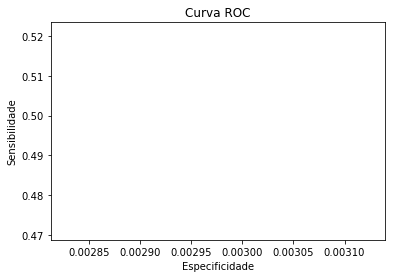

In [144]:
plt.plot(lx,ly)
plt.ylabel('Sensibilidade')
plt.xlabel('Especificidade')
plt.title('Curva ROC')
plt.show()

In [145]:
coef

[0.63695621229340416]

___
## 5. Qualidade do Classificador alterando a base de treinamento

In [ ]:
SS = []
HH = []

for i in range(1000):
    train, test = train_test_split(xlsx, test_size = 0.25)
    train.reset_index()
    test.reset_index()
    
    C = test.Email.apply(testando,1)
    test["Resultados"] = C
    
    ct3 = pd.crosstab(test.Class, test.Resultados)
    xx = ct.spam['spam']/(ct.spam['spam']+ct.spam['ham'])
    yy = ct.ham['ham']/(ct.ham['ham']+ct.ham['spam'])
    SS.append(xx)
    HH.append(yy)

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
